In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import numpy as np


file_path = '/content/drive/MyDrive/9900data/EDCPCE-replace0toNan.xlsx'
data = pd.read_excel(file_path)


data.replace('ND', np.nan, inplace=True)

data.dropna(subset=['EDC_delta13C'], inplace=True)

data.dropna(axis=1, inplace=True)


X = data.drop(['EDC_delta13C', 'mine'], axis=1)
y = data['EDC_delta13C'].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svr = SVR(kernel='linear')
selector = RFE(svr, n_features_to_select=30, step=1)
X_selected = selector.fit_transform(X_scaled, y)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
R²: 0.7546222064344412
MSE: 9.266647665402532
RMSE: 3.0441168941751453


Selected features: Index(['Depth',
       'k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__; s__',
       'k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Paludibacter; s__',
       'k__Archaea; p__Euryarchaeota; c__Thermoplasmata; o__E2; f__[Methanomassiliicoccaceae]; g__; s__.1',
       'k__Bacteria; p__Chloroflexi; c__Anaerolineae; o__WCHB1-50; f__; g__; s__.1',
       'k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales.4',
       'k__Bacteria; p__Acidobacteria; c__Solibacteres; o__Solibacterales; f__; g__; s__.3',
       'k__Bacteria; p__OP3; c__koll11; o__GIF10; f__; g__; s__.7',
       'k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Thiobacterales; f__; g__; s__.1',
       'k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__EtOH8; g__; s__.1',
       'k__Bacteria; p__Chloroflexi; c__Ellin6529; o__; f__; g__; s__.3',
       'k__Bacteria.76',
       'k__Bacteria; p

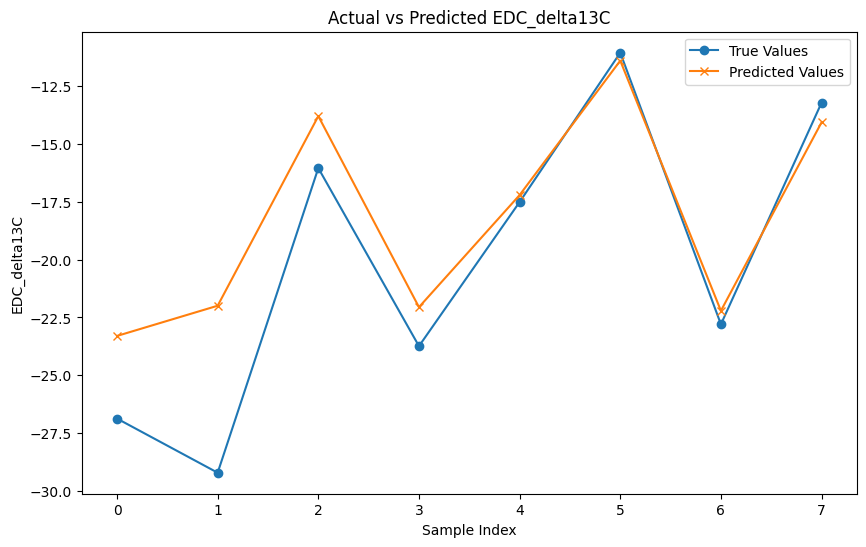

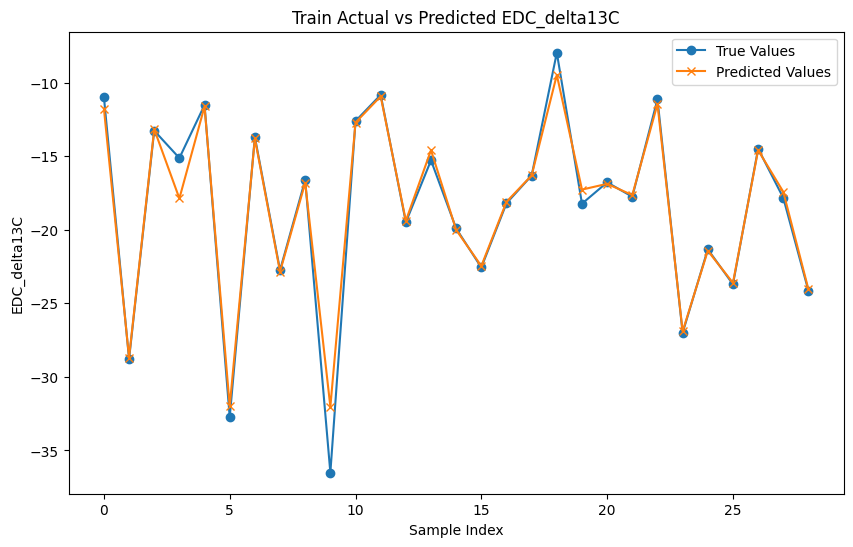

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Data preprocessing
file_path = '/content/drive/MyDrive/9900data/EDCPCE-replace0toNan.xlsx'
data = pd.read_excel(file_path)

# Replace 'ND' with NaN
data.replace('ND', np.nan, inplace=True)

# drop NaN of 'EDC_delta13C'
data.dropna(subset=['EDC_delta13C'], inplace=True)

# drop NaN features
data.dropna(axis=1, inplace=True)

X = data.drop(['EDC_delta13C', 'mine'], axis=1)
y = data['EDC_delta13C'].astype(float)

# Standardized features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use RFE to select the 30 most important features.
svr = SVR(kernel='linear')
selector = RFE(svr, n_features_to_select=30, step=1)
X_selected = selector.fit_transform(X_scaled, y)

# print features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)
print()

# Use PCA to reduce the dimensionality of the features and preserve 95% of the variance.
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Using Grid Search for Model Optimization
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Model
best_svr = grid_search.best_estimator_

# Training set evaluation
y_train_pred = best_svr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f'Train R²: {r2_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print()

# Testing set evaluation
y_test_pred = best_svr.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Test R²: {r2}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print()

# Comparison between predicted EDC_delta13C and actual EDC_delta13C data
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values', marker='o')
plt.plot(y_test_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('EDC_delta13C')
plt.title('Actual vs Predicted EDC_delta13C')
plt.legend()
plt.show()
print()

# Comparison chart of actual and predicted values in the training set
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='True Values', marker='o')
plt.plot(y_train_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('EDC_delta13C')
plt.title('Train Actual vs Predicted EDC_delta13C')
plt.legend()
plt.show()
